# MALL CUSTOMER WITH CLUSTERING ANALYSIS

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [117]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [118]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Membuat data visualization

Text(0, 0.5, 'Count')

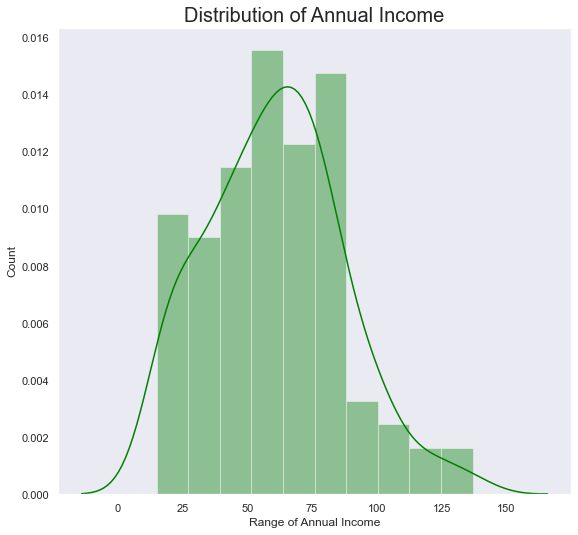

In [130]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'darkgrid')
sns.distplot(data['Annual Income (k$)'], color = 'green')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

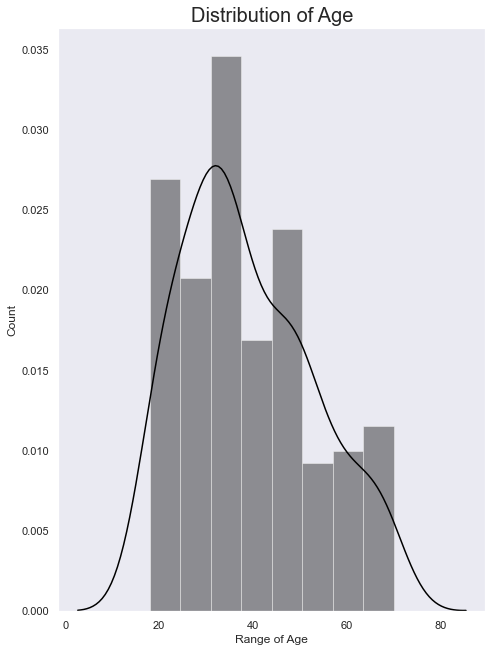

In [134]:
plt.subplot(1, 2, 2)
sns.set(style = 'darkgrid')
sns.distplot(data['Age'], color = 'black')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Berdasarkan 2 chart diatas dapat dilihat pola distribusi pendapatan dan umur tahunan.
 - Dapat dilihat bahwa kebanyakan orang berpenghasilan rata-rata dari 50-85 dolar AS, tidak banyak juga yang berpenghasilan 100 dolar keatas, dan juga terdapat orang dengan penghasilan terkecil yaitu 20dolar
 - Pengunjung yang paling sering mengunjungi mall adalah pelanggan dengan rentang umur 30 hingga 35, pelanggan yang lumayan mengunjungi mall adalah sekitaran 20-25 dan 45-50. selebihnya lebih sedikit mengunjunginya

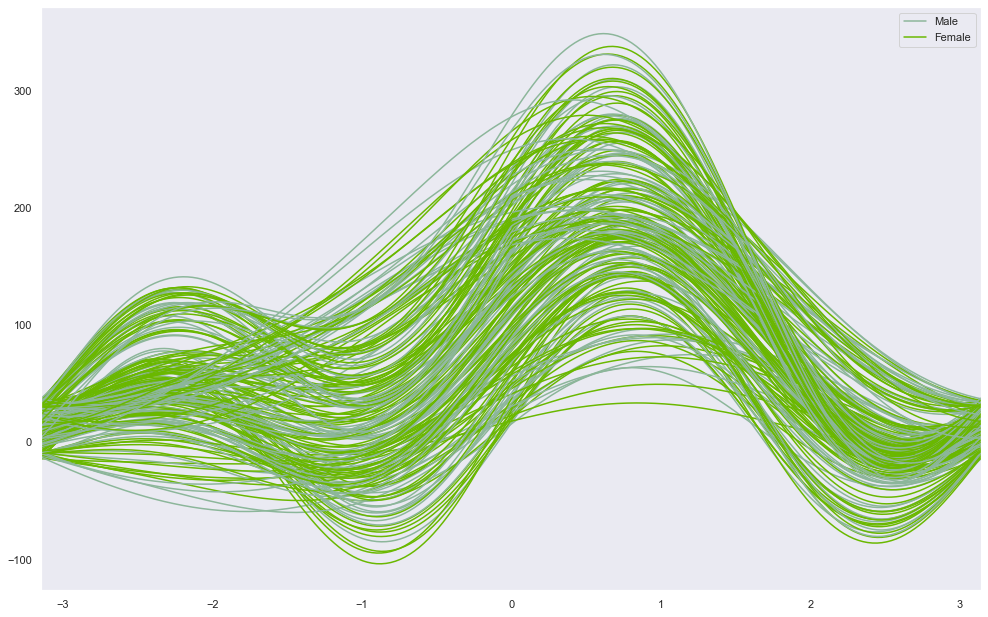

In [131]:
plt.rcParams['figure.figsize'] = (15, 10)

q = pd.plotting.andrews_curves(data, 'Gender') 
q.plot()
plt.show()

Berdasarkan kurva Andrews diatas menjelaskan bahwa kurva mampu mempertahankan sarana, jarak (hingga konstanta), dan varians. Artinya, kurva Andrews yang diwakili oleh fungsi yang berdekatan menunjukkan bahwa titik data yang sesuai juga akan berdekatan

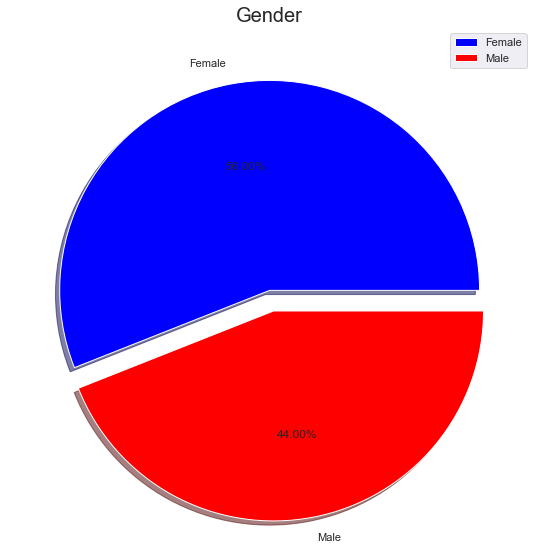

In [122]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['blue', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Berdasarkan piechart diatas, diketahui bahwa wanita lebih sering mengunjungi mall daripada laki-laki dengan persentase 56% : 44%. Hal itu juga merupakan kesenjangan yang sangat besar mengingat ketika populasi pria relatif lebih tinggi dari wanita.

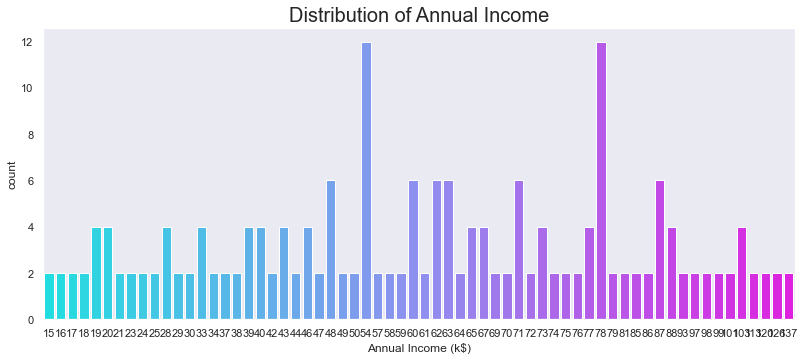

In [124]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(data['Annual Income (k$)'], palette = 'cool')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()


Ini juga bagan untuk lebih menjelaskan Distribusi Setiap tingkat Pendapatan, Menarik ada pelanggan di mal dengan freqyuency yang sangat sebanding dengan Pendapatan Tahunan mereka mulai dari 15 Dolar AS hingga 137K Dolar AS. Ada lebih banyak Pelanggan di Mall yang memiliki Penghasilan Tahunan sebagai 54rb Dolar AS atau 78 Dolar AS.

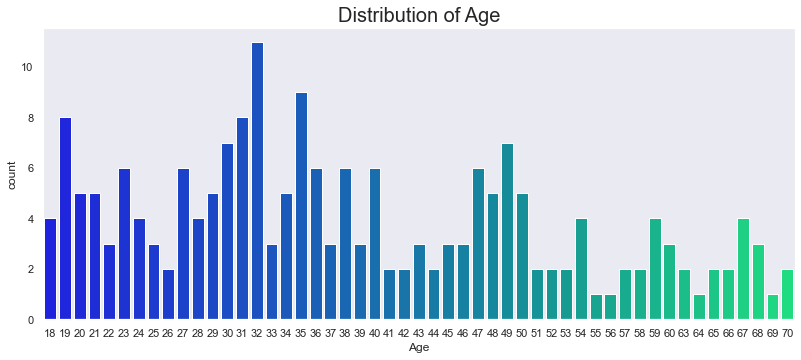

In [123]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.countplot(data['Age'], palette = 'winter')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

Grafik diatas menunjukkan Bagan yang lebih Interaktif tentang distribusi masing-masing Kelompok Umur di Mall untuk lebih jelasnya tentang Kelompok Umur Pengunjung di Mall.
   - Dengan melihat grafik di atas-, terlihat bahwa usia 27 hingga 39 tahun sangat sering terjadi tetapi tidak ada pola yang jelas, kita hanya dapat menemukan beberapa pola bijak kelompok seperti kelompok usia yang lebih tua lebih jarang dibandingkan . Fakta Menarik, Tidak ada yang sama. Pengunjung di Mall untuk Usia 18 dan 67. Orang-orang berusia 55, 56, 69, 64 sangat jarang berada di Mal. Orang-orang di Usia 32 adalah Pengunjung Paling Sering di Mall.

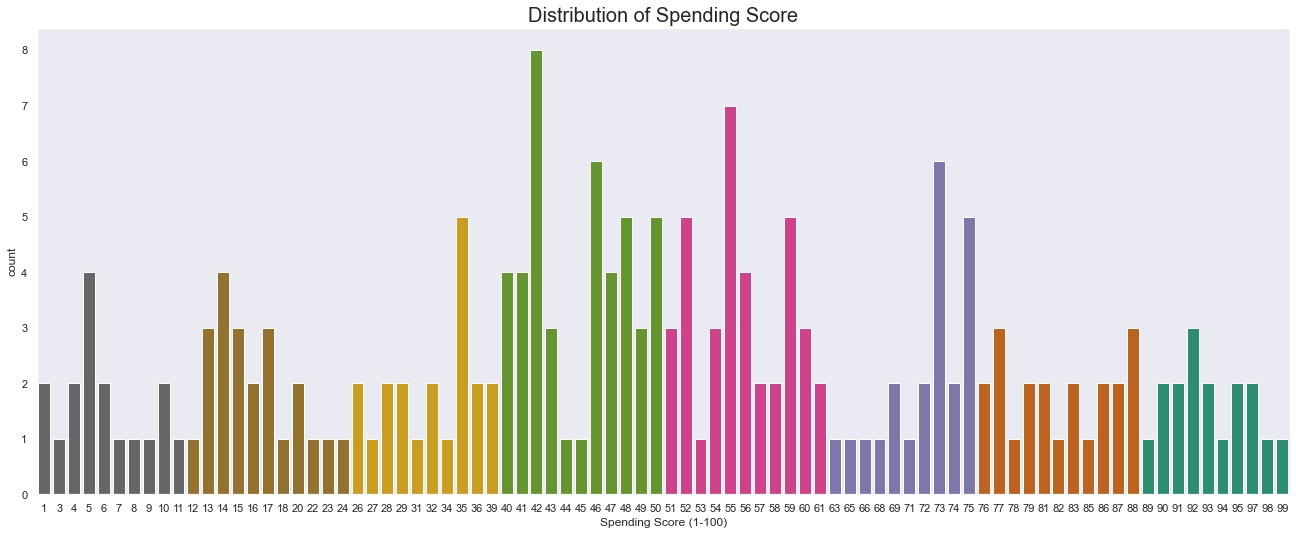

In [125]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'Dark2_r')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

Ini adalah Bagan Paling Penting dalam perspektif Mall, karena Sangat Penting untuk memiliki beberapa intuisi dan gagasan tentang Skor Pengeluaran Pelanggan yang Mengunjungi Mall.
- Secara umum, dapat menyimpulkan bahwa sebagian besar Pelanggan memiliki Skor Pembelanjaan di kisaran 35-60. Menariknya ada pelanggan yang memiliki skor saya belanja juga, dan skor Belanja 99 juga, Yang menunjukkan bahwa mal melayani berbagai Pelanggan dengan berbagai kebutuhan dan persyaratan yang tersedia di Mall.

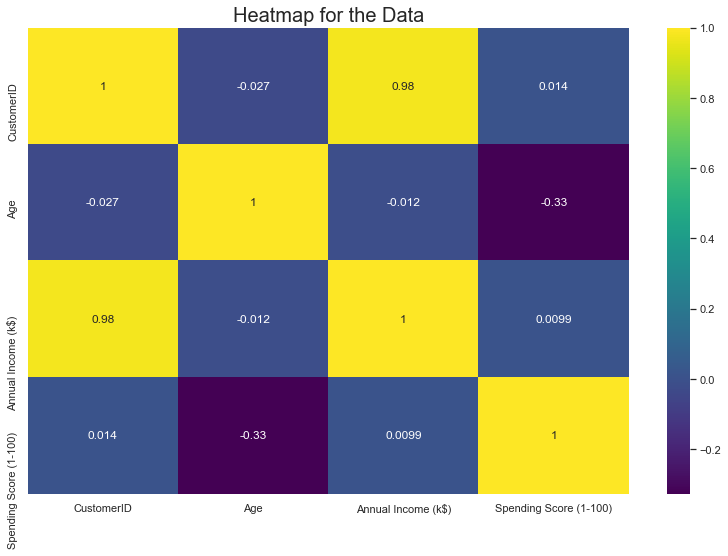

In [126]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Grafik Di Atas untuk Menampilkan korelasi antara atribut yang berbeda dari Kumpulan Data Segementasi Pelanggan Mall, Peta panas ini mencerminkan fitur yang paling berkorelasi dengan Warna Oranye dan fitur yang paling sedikit berkorelasi dengan warna kuning.
- Dapat dilihat dengan jelas bahwa atribut ini tidak memiliki korelasi yang baik di antara mereka, oleh karena itu kami akan melanjutkan dengan semua fitur.

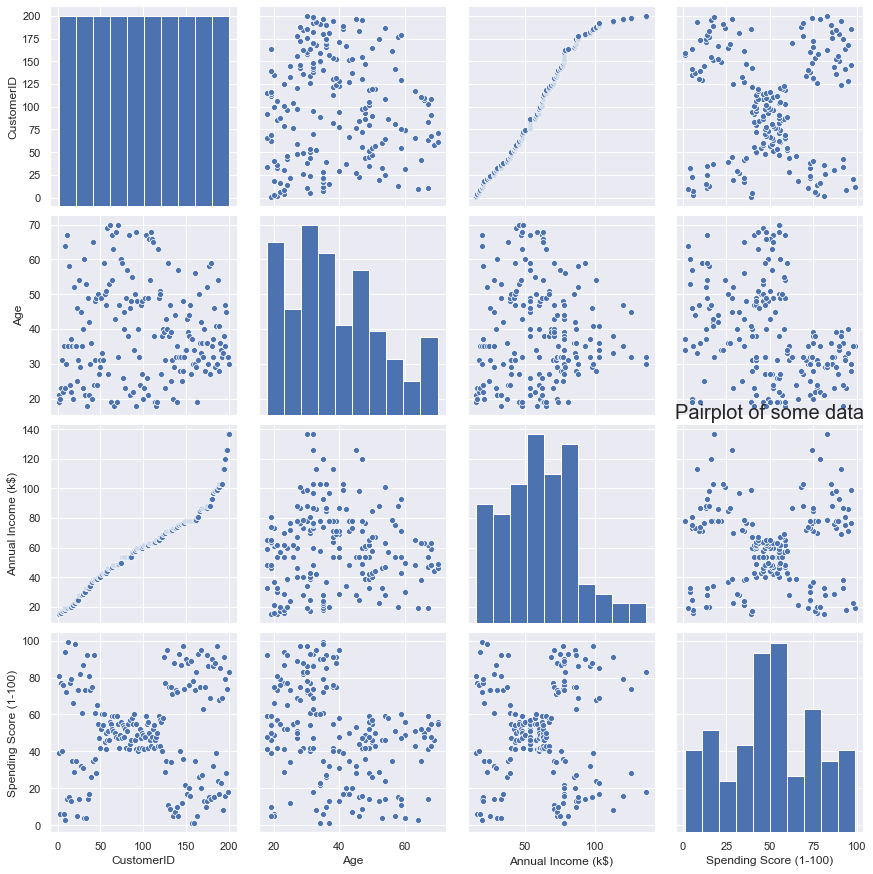

In [136]:
sns.pairplot(data,height=3)
plt.title('Pairplot of some data', fontsize = 20)
plt.show()

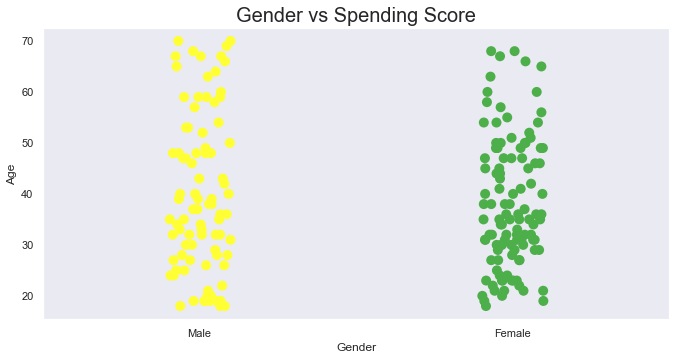

In [97]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.stripplot(data['Gender'], data['Age'], palette = 'Set1_r', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

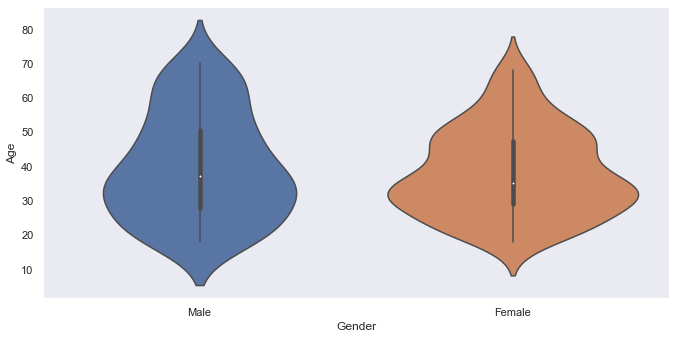

In [98]:
sns.violinplot(x='Gender',y='Age',data=data,size=8)
plt.show()

Untuk visualisasi lebih baik pada pendapatan dari gender yang berbeda. 
Terdapat lebih banyak laki-laki yang dibayar lebih dari perempuan. Namun, jumlah pria dan wanita sama jumlahnya dalam hal pendapatan tahunan yang rendah.

# Standardize the variables

In [99]:
from sklearn import preprocessing
data = data.drop(['Gender'],axis = 1)
x_scaled = preprocessing.scale(data)
x_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

# Visualization Cluster (unscaled data)

In [100]:
from sklearn.cluster import KMeans

x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

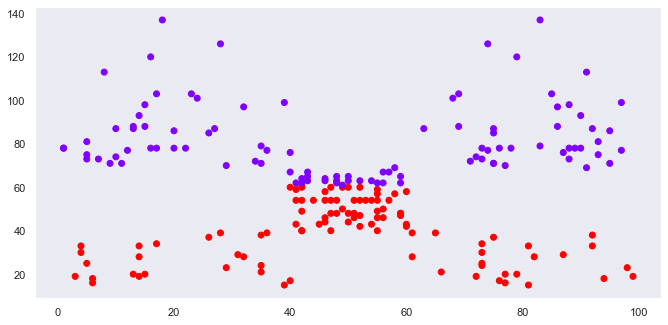

In [101]:
clusters = data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
plt.scatter(clusters['Spending Score (1-100)'],clusters['Annual Income (k$)'],c=clusters['cluster_pred'],cmap='rainbow')


# Visualization Cluster (scaled data)

In [102]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [103]:
clusters_scaled = data.copy()
clusters_scaled['cluster_pred'] = kmeans_scaled.fit_predict(x_scaled)

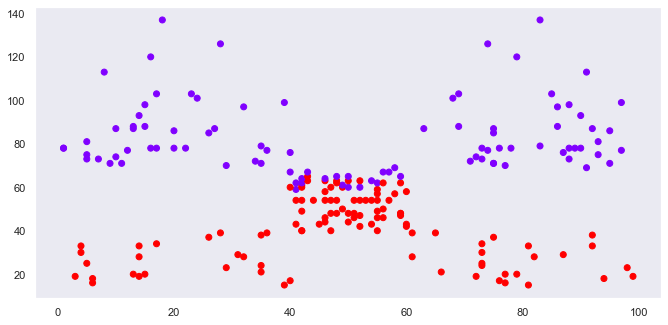

In [104]:
plt.scatter(clusters_scaled['Spending Score (1-100)'],clusters_scaled['Annual Income (k$)'],c=clusters_scaled['cluster_pred'],cmap='rainbow')

# Elbow Method

In [105]:
wcss = []
cl_num = 10
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[800.0000000000003,
 515.6688891233368,
 375.2643070614756,
 259.6936255682394,
 209.5783837699584,
 160.97567568819875,
 144.80877343242926,
 130.74624956095778,
 116.48941150375566]

Text(0, 0.5, 'Within-cluster sum of squares')

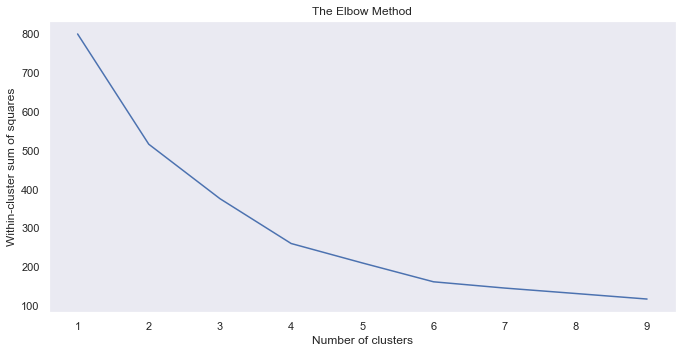

In [106]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

# Make comparation about the clusters

In [107]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [108]:
clusters_3 = x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)

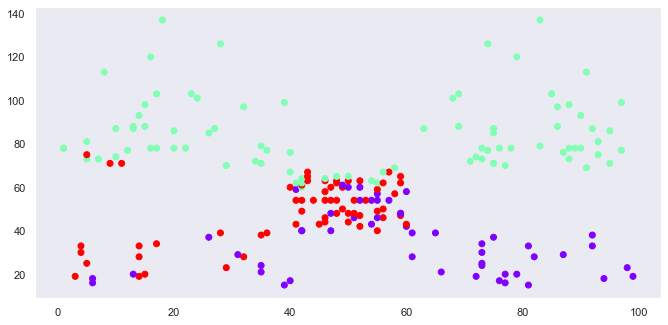

In [109]:
plt.scatter(clusters_3['Spending Score (1-100)'],clusters_3['Annual Income (k$)'],c=clusters_3['cluster_pred'],cmap='rainbow')


In [110]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(n_clusters=5)

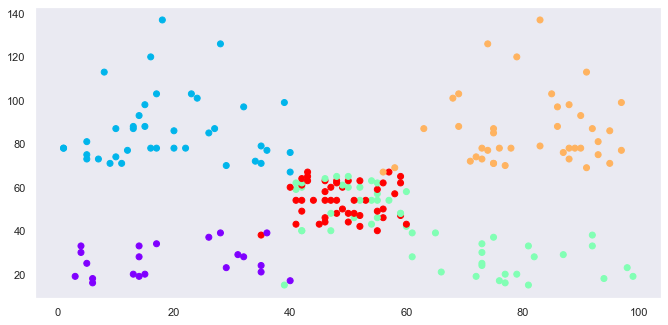

In [111]:
clusters_5 = x.copy()
clusters_5['cluster_pred'] = kmeans_5.fit_predict(x_scaled)
plt.scatter(clusters_5['Spending Score (1-100)'],clusters_5['Annual Income (k$)'],c=clusters_5['cluster_pred'],cmap='rainbow')


### Dendogram untuk mengoptimalisasi dalam pencarian cluster

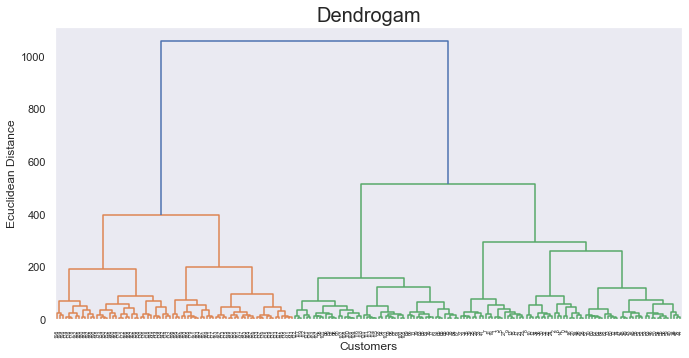

In [112]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

# Cluster pelanggan berdasarkan umur

In [113]:
corrs = data.corr().values
corrs

array([[ 1.        , -0.02676289,  0.97754846,  0.01383499],
       [-0.02676289,  1.        , -0.01239804, -0.32722685],
       [ 0.97754846, -0.01239804,  1.        ,  0.00990285],
       [ 0.01383499, -0.32722685,  0.00990285,  1.        ]])

In [114]:
x = data.drop(['CustomerID','Spending Score (1-100)'],axis = 1)
x.shape

(200, 2)

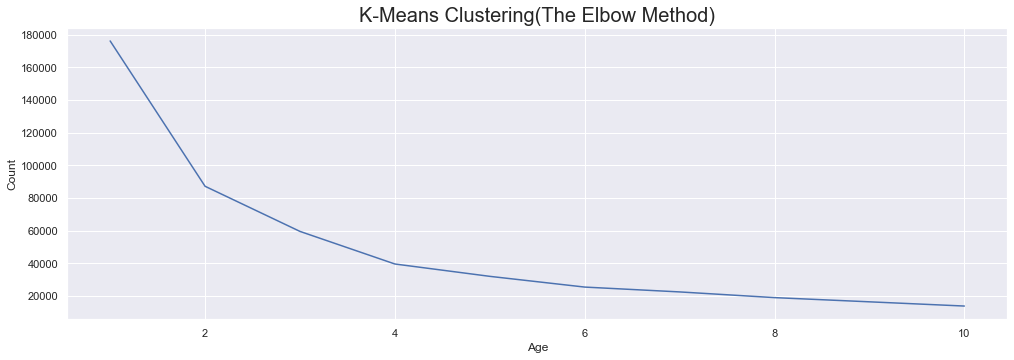

In [115]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()